In [2]:
import numpy as np
import pandas as pd

In [4]:
# Start to load the dataset week_purchases18-25.txt into R session and next
df = pd.read_csv(filepath_or_buffer='week_purchases18-25.txt', sep='\t', quotechar='"', skipinitialspace=True)
df

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,25/02/2001,Myself
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,22/02/2001,Family
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,21/02/2001,Family
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,22/02/2001,Myself
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,user_972607,MRS,DORIS6273,36217755-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_23136195,1031,Musical,Cryin in the Rain,5.99,02:49:01,22/02/2001,NaN
735,user_975665,MR,BORIS95778,43605144-Boris Road-Doris Town,USA,M,23.0,Adventure,Order_ID_26082375,1043,Comedy,Fetche la Vache,15.99,22:09:40,22/02/2001,Myself
736,user_979177,MRS,DORIS74765,94620905-Boris Road-Doris Town,UK,F,35.0,Children,Order_ID_75110109,1060,Children,The Buppets,5.99,12:49:10,22/02/2001,Family
737,user_99281,MR,BORIS13620,57719599-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_34100400,1022,Sci-Fi,The Tempest,7.99,21:02:11,25/02/2001,NaN


In [5]:
# Check its size
df.size

11824

In [6]:
# Get a summary of data
df.describe()

,Age,Product_ID,Price
count,444.000000,739.000000,739.000000
mean,43.182432,1039.170501,8.742368
std,14.657891,17.813339,2.879627
min,21.000000,1001.000000,5.990000
25%,32.000000,1024.000000,5.990000
50%,37.000000,1042.000000,7.990000
75%,58.000000,1056.000000,9.990000
max,75.000000,1062.000000,15.990000


In [18]:
# Check which columns are numeric and which are categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])
print("Numerical columns:")
print(numerical_columns.columns.to_list())

print("Categorical columns")
print(categorical_columns.columns.to_list())

Numerical columns:
['Age', 'Product_ID', 'Price']
Categorical columns
['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Favourites', 'Order_ID', 'Style', 'Film_Title', 'PurchTime', 'PurchDate', 'Buy_for']


In [20]:
# check for missing data by rows and by columns
df.isnull().sum()

Username        0
TitleCli        0
Name            0
Address         0
Country       295
Gender        295
Age           295
Favourites    295
Order_ID        0
Product_ID      0
Style           0
Film_Title      0
Price           0
PurchTime       0
PurchDate       0
Buy_for       295
dtype: int64

In [22]:
df[df['Country'].isnull()]

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
10,user_1080843,MISS,DORIS94941,59282111-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_70422638,1043,Comedy,Fetche la Vache,15.99,16:01:54,24/02/2001,NaN
12,user_1108073,MRS,DORIS85614,63812450-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_90818732,1062,Children,Bogus the Clown,5.99,23:52:26,23/02/2001,NaN
13,user_1110401,MRS,DORIS26251,57864033-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_50983401,1006,Western,TheatreBus,5.99,21:45:53,22/02/2001,NaN
14,user_1110401,MRS,DORIS26251,57864033-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_72039684,1004,Western,Low Midnight,9.99,02:18:35,20/02/2001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,user_96895,MRS,DORIS86286,37758240-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_87558488,1005,Western,The average six,12.99,19:38:29,25/02/2001,NaN
733,user_971746,MR,BORIS115693,51503343-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_34845183,1052,Sci-Fi,Fourth of July,9.99,03:12:59,20/02/2001,NaN
734,user_972607,MRS,DORIS6273,36217755-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_23136195,1031,Musical,Cryin in the Rain,5.99,02:49:01,22/02/2001,NaN
737,user_99281,MR,BORIS13620,57719599-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_34100400,1022,Sci-Fi,The Tempest,7.99,21:02:11,25/02/2001,NaN


In [ ]:
#Using the appropriate graphs, analyse the various attributes of the data set and make necessary corrections
#to the data.:

0

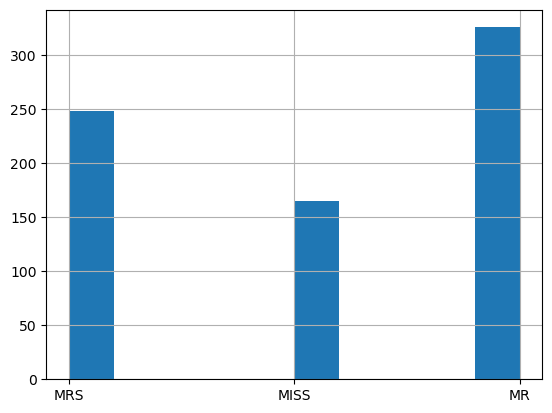

In [31]:
# TitleCli(ent)
df['TitleCli'] = df['TitleCli'].str.strip()
df['TitleCli'].unique()
df['TitleCli'].hist()

Gender
F    413
M    326
Name: count, dtype: int64


,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,25/02/2001,Myself
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,22/02/2001,Family
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,21/02/2001,Family
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,M,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,22/02/2001,Myself
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,user_972607,MRS,DORIS6273,36217755-Boris Road-Doris Town,NaN,F,NaN,NaN,Order_ID_23136195,1031,Musical,Cryin in the Rain,5.99,02:49:01,22/02/2001,NaN
735,user_975665,MR,BORIS95778,43605144-Boris Road-Doris Town,USA,M,23.0,Adventure,Order_ID_26082375,1043,Comedy,Fetche la Vache,15.99,22:09:40,22/02/2001,Myself
736,user_979177,MRS,DORIS74765,94620905-Boris Road-Doris Town,UK,F,35.0,Children,Order_ID_75110109,1060,Children,The Buppets,5.99,12:49:10,22/02/2001,Family
737,user_99281,MR,BORIS13620,57719599-Boris Road-Doris Town,NaN,M,NaN,NaN,Order_ID_34100400,1022,Sci-Fi,The Tempest,7.99,21:02:11,25/02/2001,NaN


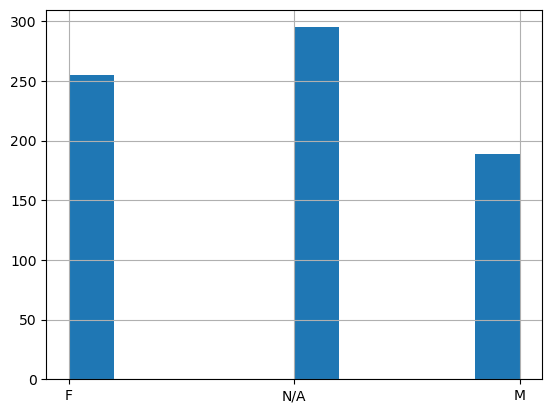

In [50]:
# Gender => replace the missing values with M or F
df['Gender'].hist();
df['Gender'].unique();
df['Gender'] = 'F'
df.loc[df['TitleCli'] == 'MR', 'Gender'] = 'M'
print(df.astype(str)['Gender'].value_counts())

In [52]:
# Country => OuterMongolia is an 'isolated' value, so we need to remove it
print(df.astype(str)['Country'].value_counts())
df = df[df.Country != 'OuterMongolia']
print(df.astype(str)['Country'].value_counts())

Country
nan              295
UK               270
USA              173
OuterMongolia      1
Name: count, dtype: int64
Country
nan    295
UK     270
USA    173
Name: count, dtype: int64


In [49]:
# Number of films sold by Style
df.groupby('Style')['Product_ID'].count()

Style
Adventure     47
Children     151
Comedy       214
Drama         94
Horror        50
Musical       28
Sci-Fi        92
Western       63
Name: Product_ID, dtype: int64

In [62]:
# Number of different Film_Title sold by Style
df.groupby('Style')['Film_Title'].nunique()

Style
Adventure     5
Children      3
Comedy       18
Drama         3
Horror        4
Musical       5
Sci-Fi       11
Western      12
Name: Film_Title, dtype: int64

In [81]:
# Number of units sold for each Film_title / Style
df[['Style', 'Film_Title']].value_counts()

Style      Film_Title                         
Children   The Buppets                            52
           The Buppets go to London               51
           Bogus the Clown                        48
Drama      Rebel without a Clue                   46
           The French Patient                     35
                                                  ..
Comedy     The Noisy Man                           3
Western    Clutch Bassidy and the Cundance Bid     2
Musical    Me and the King                         2
Comedy     The Red Leopard                         2
Horror     Invasion of the Baby Snatchers          2
Name: count, Length: 61, dtype: int64

In [86]:
# Number of Customers who bought 1,2,3,4 DVDs
df['Username'].value_counts().value_counts()

Number of customers who bought 1 DVD: 546
Number of customers who bought 2 DVDs: 148
Number of customers who bought 3 DVDs: 36
Number of customers who bought 4 DVDs: 8


count
1    546
2     74
3     12
4      2
Name: count, dtype: int64

In [90]:
# Create a summary table with Style/Uni_Vnd/Min_Prc/Max_Prk/Avg_Prck/DesvPad_Prd
df.groupby('Style').agg({'Price':['count', 'min', 'max', 'mean', 'std']})

Price                                  
          count   min    max       mean       std
Style                                            
Adventure    47  7.99  12.99  11.607021  1.951067
Children    151  5.99   5.99   5.990000  0.000000
Comedy      214  5.99  15.99  10.027383  3.325602
Drama        93  7.99   7.99   7.990000  0.000000
Horror       50  5.99   8.99   7.310000  1.463013
Musical      28  5.99   5.99   5.990000  0.000000
Sci-Fi       92  5.99  15.99  10.685652  2.314499
Western      63  5.99  12.99   9.482063  2.422163

In [114]:
# Transform string date to datetime
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

C:\Users\Stepa\AppData\Local\Temp\ipykernel_3440\1550120466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])


0     1900-01-01 23:50:02
1     1900-01-01 23:40:18
2     1900-01-01 08:37:27
3     1900-01-01 20:17:16
4     1900-01-01 21:12:49
              ...        
734   1900-01-01 02:49:01
735   1900-01-01 22:09:40
736   1900-01-01 12:49:10
737   1900-01-01 21:02:11
738   1900-01-01 04:11:51
Name: PurchTime, Length: 738, dtype: datetime64[ns]

In [106]:
# Day of the Week Purchase (Sunday, ..., Saturday)
def calc(row):
    return row['PurchDate'].strftime('%A')
df['PurchaseDay'] = df.apply(calc, axis=1)
df['PurchaseDay']

C:\Users\Stepa\AppData\Local\Temp\ipykernel_3440\2223498150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchaseDay'] = df.apply(calc, axis=1)


pandas._libs.tslibs.timestamps.Timestamp

In [120]:
# Purchase Period (morning, afternoon, evening)
def get_dayperiod(row):
    datetime = row['PurchTime']
    if datetime.hour >= 20 or datetime.hour < 6:
        return 'evening'
    if datetime.hour >= 12:
        return 'afternoon'
    
    return 'morning'
df['PurchasePeriod'] = df.apply(get_dayperiod, axis=1)
df[['PurchasePeriod', 'PurchTime']]

C:\Users\Stepa\AppData\Local\Temp\ipykernel_3440\3384195599.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PurchasePeriod'] = df.apply(get_dayperiod, axis=1)


,PurchasePeriod,PurchTime
0,evening,1900-01-01 23:50:02
1,evening,1900-01-01 23:40:18
2,morning,1900-01-01 08:37:27
3,evening,1900-01-01 20:17:16
4,evening,1900-01-01 21:12:49
...,...,...
734,evening,1900-01-01 02:49:01
735,evening,1900-01-01 22:09:40
736,afternoon,1900-01-01 12:49:10
737,evening,1900-01-01 21:02:11


In [134]:
# Price range (low, medium, high)
def get_pricerange(row):
    price = row['Price']

    if price < 6:
        return 'Low'

    if price > 10:
        return 'High'

    return 'Medium' 

df['PriceRange'] = df.apply(get_pricerange, axis=1)

C:\Users\Stepa\AppData\Local\Temp\ipykernel_3440\1695366153.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceRange'] = df.apply(get_pricerange, axis=1)


In [135]:
# Age Group (young, middle-aged, elderly)
def get_agegroup(row):
    age = row['Age']
    if age > 60:
        return 'Elderly'
    if age > 35:
        return 'Middle-aged'
    return 'Young'

df['AgeGroup'] = df.apply(get_agegroup, axis=1)
df[['AgeGroup', 'Age']]

C:\Users\Stepa\AppData\Local\Temp\ipykernel_3440\1460428847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = df.apply(get_agegroup, axis=1)


,AgeGroup,Age
0,Young,27.0
1,Middle-aged,36.0
2,Middle-aged,38.0
3,Young,NaN
4,Young,25.0
...,...,...
734,Young,NaN
735,Young,23.0
736,Young,35.0
737,Young,NaN


<Axes: >

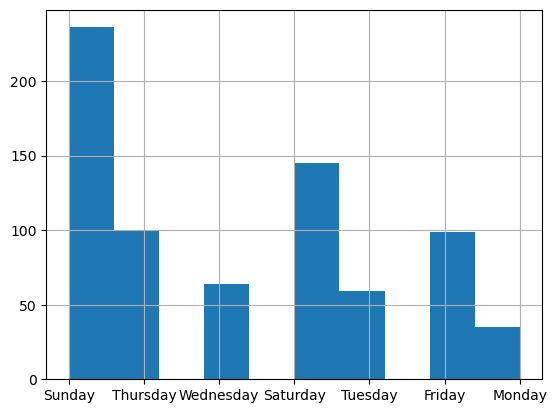

In [128]:
# Using the appropriate graphics analyse the novel attributes:
# Purchases by day
df['PurchaseDay'].hist();

<Axes: xlabel='PurchasePeriod'>

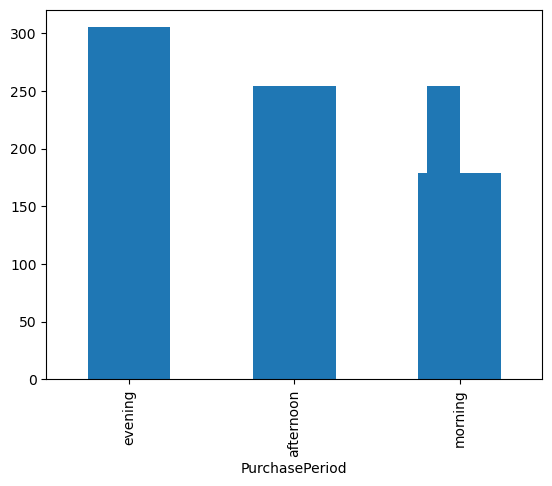

In [142]:
# Purchases by time of day
df['PurchasePeriod'].hist();
df['PurchasePeriod'].value_counts().plot.bar()

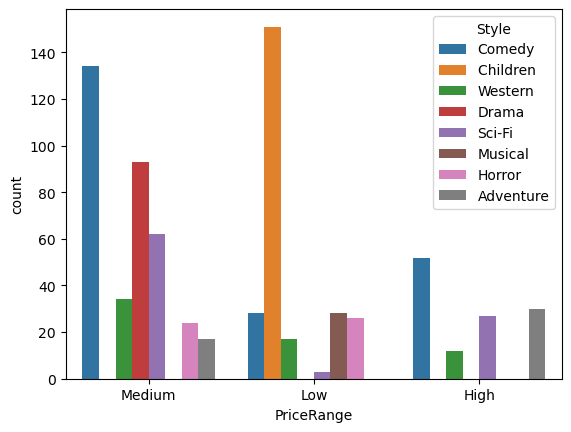

In [139]:
# Price range vs. style
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='PriceRange', hue='Style', data=df)
plt.show()

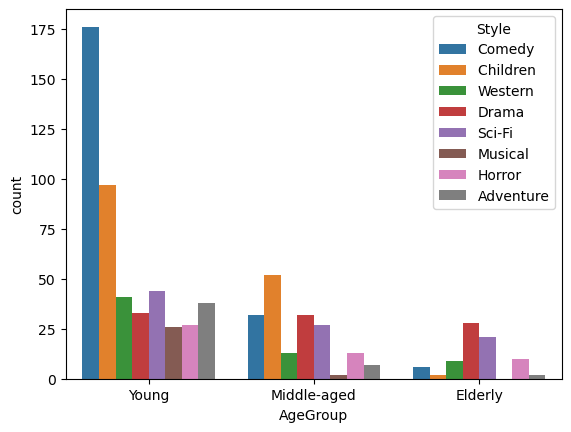

In [140]:
# Age Group vs. style
sns.countplot(x='AgeGroup', hue='Style', data=df)
plt.show()

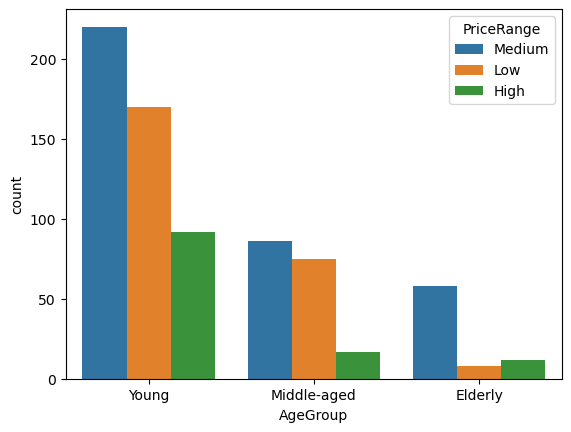

In [141]:
# Age Group vs. Price range
sns.countplot(x='AgeGroup', hue='PriceRange', data=df)
plt.show()